In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as st
from tqdm import tqdm
from ipywidgets import interact
from ipywidgets.widgets import Dropdown
import seaborn as sns
%matplotlib inline

In [7]:
marketing=pd.read_csv('Marketing_Spend.csv')
marketing.columns=['Date','Off','On']
online=pd.read_csv('online.csv')
FK=pd.read_csv('KEY_SKU.csv')
retail=pd.read_csv('Retail.csv')

In [232]:
def date_fix(x):
    return datetime.strptime(str(x)[:4]+' '+str(x)[4:6]+' '+str(x)[6:8],'%Y %m %d')#.date()

In [147]:
def date_fix2(x):
    return datetime.strptime(x,'%Y-%m-%d').date()

In [11]:
ret_mer=retail.merge(FK,on='StockCode')

In [128]:
SKU_Price=pd.DataFrame(online.groupby('Product SKU')['Avg. Price'].median()).reset_index()

In [130]:
ret_final=ret_mer.merge(SKU_Price,on='Product SKU')

In [19]:
mx=online.groupby('Product SKU')['Avg. Price'].max()
mn=online.groupby('Product SKU')['Avg. Price'].min()
max(mx-mn)

237.69

In [36]:
mx[:3]

Product SKU
GGOEA0CH077599    15.46
GGOEAAAB034813    19.99
GGOEAAAB034814    19.99
Name: Avg. Price, dtype: float64

In [24]:
diff=mx-mn

Text(0.5, 1.0, 'Different Prices of SKUs')

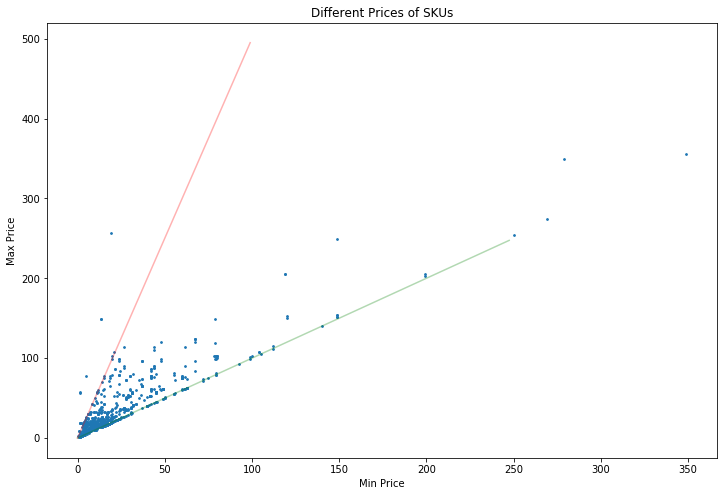

In [171]:
plt.figure(figsize=(12,8))
plt.scatter(mn,mx,s=3)
x=np.arange(100)
plt.plot(2.5*x,2.5*x,c='g',alpha=.3)
plt.plot(x,5*x,c='r',alpha=.3)
plt.xlabel('Min Price')
plt.ylabel('Max Price')
plt.title('Different Prices of SKUs')

In [49]:
ratio=mx/mn
ratio=pd.DataFrame(ratio)
ratio=ratio.reset_index()
ratio=ratio.merge(online[['Product SKU','Product Category (Enhanced E-commerce)','Product']])

In [50]:
ratio.head()

,Product SKU,Avg. Price,Product Category (Enhanced E-commerce),Product
0,GGOEA0CH077599,1.289408,Notebooks & Journals,Android Hard Cover Journal
1,GGOEA0CH077599,1.289408,Notebooks & Journals,Android Hard Cover Journal
2,GGOEA0CH077599,1.289408,Notebooks & Journals,Android Hard Cover Journal
3,GGOEA0CH077599,1.289408,Notebooks & Journals,Android Hard Cover Journal
4,GGOEA0CH077599,1.289408,Notebooks & Journals,Android Hard Cover Journal


In [103]:
top15=ratio.sort_values('Avg. Price',ascending=False).drop_duplicates()[:15]

In [70]:
temp.head(2)

,Transaction ID,Date,Product SKU,Product,Product Category (Enhanced E-commerce),Quantity,Avg. Price,Revenue,Tax,Delivery
47268,21148,20170223,GGOENEBJ079499,Nest® Learning Thermostat 3rd Gen-USA - Stainl...,Nest-USA,1.0,19.19,168.19,17.91,6.5
30868,30524,20170616,GGOENEBJ079499,Nest® Learning Thermostat 3rd Gen-USA - Stainl...,Nest-USA,3.0,149.00,1191.00,110.74,6.0


In [114]:
for p in top15['Product']:
    temp=online[online['Product']==p].sort_values('Avg. Price')
    print(p[:22],'\t:\t',np.round(temp['Avg. Price'].values[0],2) , '\tin\t',date_fix(temp['Date'].values[0]),'\tVS\t',min(np.round(temp['Avg. Price'].values[-1],2),256.8),'\t   in\t',date_fix(temp['Date'].values[-1]))

YouTube Men's Fleece H 	:	 1.59 	in	 2017-02-23 	VS	 57.76 	   in	 2017-01-01
YouTube Women's Fleece 	:	 1.59 	in	 2017-02-23 	VS	 55.99 	   in	 2017-03-06
Google Men's Quilted I 	:	 4.99 	in	 2017-02-23 	VS	 77.36 	   in	 2017-01-04
SPF-15 Slim & Slender  	:	 1.4 	in	 2017-09-06 	VS	 18.99 	   in	 2017-02-23
Nest® Learning Thermos 	:	 19.19 	in	 2017-02-23 	VS	 256.8 	   in	 2017-01-30
8 pc Android Sticker S 	:	 1.59 	in	 2017-10-03 	VS	 18.99 	   in	 2017-02-23
Google Kick Ball 	:	 1.59 	in	 2017-10-26 	VS	 18.99 	   in	 2017-02-23
Google Toddler Short S 	:	 13.59 	in	 2017-07-14 	VS	 149.0 	   in	 2017-02-23
Google Toddler Short S 	:	 13.59 	in	 2017-07-14 	VS	 149.0 	   in	 2017-02-23
Colored Pencil Set 	:	 1.99 	in	 2017-02-23 	VS	 18.99 	   in	 2017-02-23
Google Laptop and Cell 	:	 0.99 	in	 2017-02-23 	VS	 8.99 	   in	 2017-02-23
Foam Can and Bottle Co 	:	 0.99 	in	 2017-02-23 	VS	 8.99 	   in	 2017-02-23
Ballpoint Stick Pen 4  	:	 3.16 	in	 2017-01-04 	VS	 18.99 	   in	 2017-02

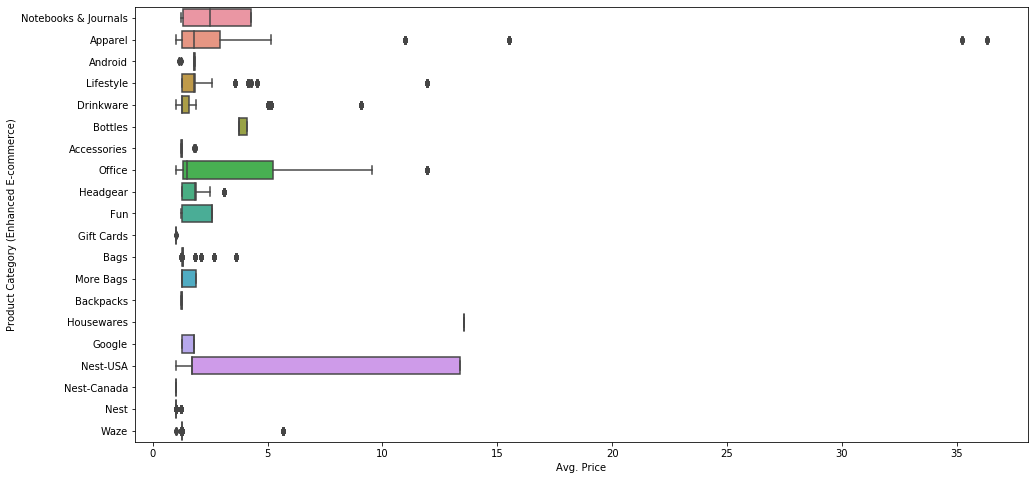

In [123]:
plt.figure(figsize=(16,8))
sns.boxplot(x=ratio['Avg. Price'],y=ratio['Product Category (Enhanced E-commerce)'])

In [155]:
ret_final['Sale']=ret_final['Avg. Price']*ret_final['Quantity']
ret_final['Month']=ret_final['InvoiceDate'].apply(lambda x:x.split('-')[1])
ret_final['DOW']=ret_final['InvoiceDate'].apply(lambda x:date_fix2(x).weekday())

In [135]:
ret_final=ret_final.sort_values('InvoiceDate')

Text(0.5, 1, 'Sale in retail data')

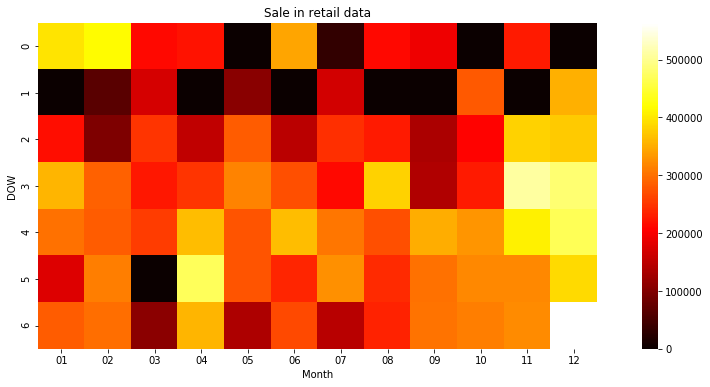

In [170]:
plt.figure(figsize=(16,6))
sns.heatmap(ret_final.groupby(['DOW','Month'])['Sale'].sum().unstack().fillna(0),cmap='hot',square=True)
plt.title('Sale in retail data')

In [141]:
ret_final.head(2)

,InvoiceNo,InvoiceDate,StockCode,Quantity,Product SKU,Avg. Price,Sale
0,536598,2017-01-01,21421,1,GGOENEBQ079099,79.00,79.00
78099,536759,2017-01-01,21781,1,GGOEYAEJ029516,4.75,4.75


Text(0.5, 1.0, 'Sale per Day of Week in Retail')

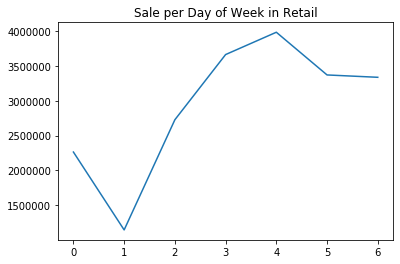

In [211]:
plt.plot(ret_final.groupby('DOW')['Sale'].sum())
plt.title('Sale per Day of Week in Retail')

In [164]:
xx=date_fix2('2017-02-23')

In [175]:
online['Sale']=online['Quantity']*online['Avg. Price']

In [210]:
freq_o=(online.groupby('Product')['Sale'].sum()).apply(int)
freq_o

Product
1 oz Hand Sanitizer                                           4644
20 oz Stainless Steel Insulated Tumbler                       9253
22 oz Android Bottle                                          2786
22 oz YouTube Bottle Infuser                                  4137
23 oz Wide Mouth Sport Bottle                                 4228
24 oz YouTube Sergeant Stripe Bottle                          5484
25L Classic Rucksack                                          7707
26 oz Double Wall Insulated Bottle                           33133
7&quot; Dog Frisbee                                           1064
8 pc Android Sticker Sheet                                    3697
Aluminum Handy Emergency Flashlight                            953
Android 17oz Stainless Steel Sport Bottle                     3489
Android 24 oz Contigo Bottle                                  3394
Android 25 oz Green Apple Stainless Steel Bottle              1115
Android 5-Panel Low Cap                               

In [173]:
import wordcloud

(-0.5, 799.5, 599.5, -0.5)

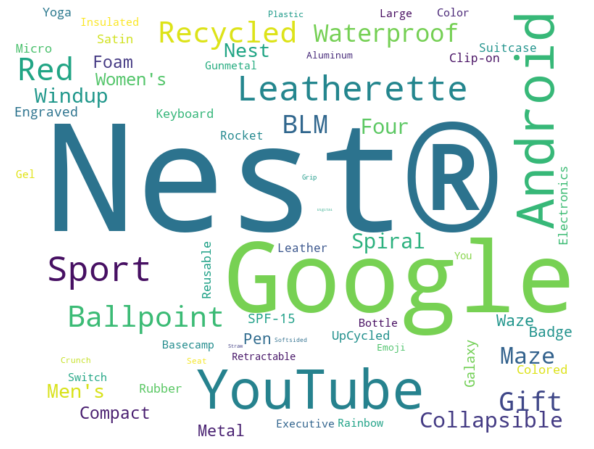

In [208]:
image=wordcloud.WordCloud(width=800,height=600,background_color='white').generate_from_frequencies(ffreq[9:])
plt.figure(figsize=(12,8))
plt.imshow(image,interpolation='bilinear')
plt.axis('off')

In [189]:
first=[]
for f in freq.index:
    first.append(f.split()[0])

In [194]:
freq.index=first

In [199]:
fdf=pd.DataFrame(freq).reset_index()

In [200]:
fdf.head(3)

,index,Sale
0,1,4644
1,20,9253
2,22,2786


In [202]:
ffreq=fdf.groupby('index')['Sale'].sum()

In [214]:
ret_final[(ret_final['Month']=='03')&(ret_final['DOW']==5)].head(2)

,InvoiceNo,InvoiceDate,StockCode,Quantity,Product SKU,Avg. Price,Sale,Month,DOW


In [233]:
online['DateTime']=online['Date'].apply(date_fix)

In [234]:
NU=(online[online['Product Category (Enhanced E-commerce)']=='Nest-USA']).groupby('DateTime')['Sale'].sum()

In [237]:
dec=st.tsa.seasonal_decompose(NU.rolling(10).mean().dropna())

In [221]:
import statsmodels.api as st

Text(0.5, 0, 'Residual')

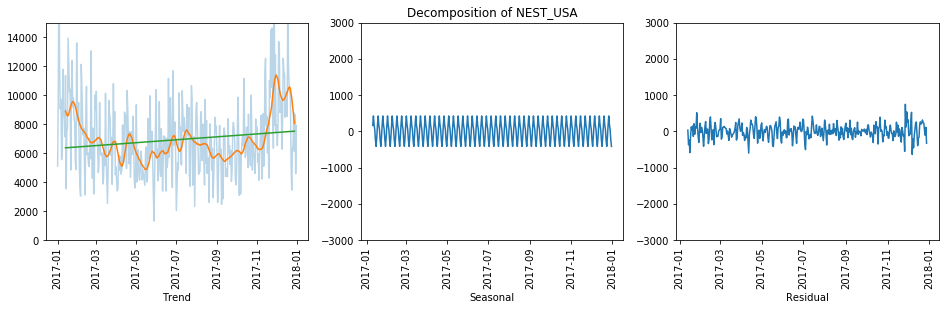

In [265]:
plt.figure(figsize=(16,4))
ax1=plt.subplot(1,3,1)
plt.plot(NU,alpha=0.3)
ax1.set_ylim([0,15000])
plt.plot(dec.trend)
plt.plot(y2.index,poly)
plt.xticks(rotation=90)
ax2=plt.subplot(1,3,2)#,sharey=ax1)
ax2.set_ylim([-3000,3000])
plt.xticks(rotation=90)
plt.plot(dec.seasonal)
plt.title('Decomposition of NEST_USA')
ax3=plt.subplot(1,3,3)#,sharey=ax1)
ax3.set_ylim([-3000,3000])
plt.plot(dec.resid)
plt.xticks(rotation=90)
ax1.set_xlabel('Trend')
ax2.set_xlabel('Seasonal')
ax3.set_xlabel('Residual')

In [241]:
y=dec.trend.dropna()
x=range(13,len(y)+13)

In [246]:
co=np.polyfit(x,y,1)

In [250]:
y2=y.copy()

In [258]:
poly=np.polyval(co,x)

In [261]:
poly=np.array(poly)

In [262]:
poly.index=y2.index

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [263]:
y2.index

DatetimeIndex(['2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
               '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
               '2017-01-21', '2017-01-22',
               ...
               '2017-12-19', '2017-12-20', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
               '2017-12-27', '2017-12-28'],
              dtype='datetime64[ns]', name='DateTime', length=350, freq=None)

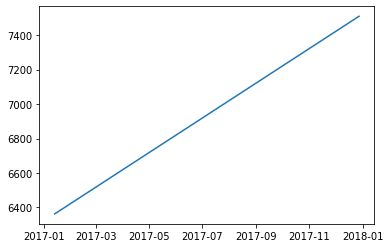

In [264]:
plt.plot(y2.index,poly)

In [ ]:
RFR()